# A/B test results

The purpose of the current A/B test is to gain an understanding of how a promotional campaign (in which the company offered a discount on an in-game item) has influenced the behavior of the game's users.

This is reflected by the metrics:

**ARPU** - average revenue per user,  

**ARPPU** - average revenue per paying user,  

**Cash spending** - spending of the in-game currency.

In other words, we want to know, if the users have started to bring the company more money and/or have become more engaged because of the discount. 
We are also interested in understanding if the results vary depending on a gaming platform (Xbox, PS4, and PC).

Therefore, the main question we aim to answer is whether the campaign has been a success and if the company should roll it out to all users.

## Methodology used

If A/B test affected users' behavior, than the metrics of the test and the controlled groups are different. 

Or, in the language of statistics, the test should reject the hypothesis that the test group and control group are drawn from the same population.

In order to do so we will calculate the confidence intervals of the arithmetic means of the values we research ('cash' and 'money'). It should be noted that the metrics ARPU and ARPPU are arithmetic means by definition. 

Usage of confidence intervals is based on the central limit theorem and the fact that **arithmetic means** of **samples** within one population of any data are always **distributed normally** (regardles of the distribution of the data itself). 

If the arithmetic mean of a value in the test group falls within the 95% confidence interval of the mean of the control group, it indicates that we can be 95% sure that both samples are drawn from the same population, i.e., the A/B test has not yielded any significant outcome.

The confidence interval formula: $$\bar{x}\pm1,96*SE$$  

Where $\bar{x}$ represents the mean, and $SE$ is the standard error of the mean, calculated as: $$SE = \frac {sd}{\sqrt{n}}$$

Where $sd$ denotes the standard deviation, and $n$ the total number of users in a sample.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

So, to calculate the confidence intervals, I will create a custom function. This function will take a series object as input and return a series object with the values representing the interval size and mean:

In [2]:
def conf_int(series):
    '''The function accepts series as an input, calculates and returnes series,
    with information about the start and stop points of the interval, 
    mean, and the 1/2 of the interval size'''
    se = series.sem()
    mean = series.mean()
    int_size = 1.96 * se   # 1/2 of the interval size.
    start = mean - int_size
    stop = mean + int_size
    interval = pd.Series([start, stop, mean, int_size], index=('start', 'stop', 'mean', 'int_size'))
    
    return interval

To make the comparison more evident,  I will create a function that combines information from both the test and control groups into a DataFrame:

In [3]:
def pair_stats(*series):
    '''The function accepts series returned by conf_int() function as an input, 
    and returns a paired DataFrame'''
    statistics = pd.DataFrame([*series], index=['Test', 'Control'])
    
    return statistics

I will use the statistics generated by pair_stats() to visualize confidence intervals using an error bar:

In [4]:
# Using errorbar() function from matplotlib.pyplot

def my_errorbar(dataframe, color, Xlable, Ylable, Title):
    '''The function accepts DataFrame, produced by pair_stats(), and displays an errorbar
    with the comparison of the intervals of the test and the control groups'''
    plt.figure(figsize=(10,8))

    plt.errorbar(x=dataframe.index, y=dataframe['mean'], yerr=dataframe['int_size'],\
                             fmt='o', color=color, capsize=7, elinewidth=2)
    plt.xlabel(Xlable)
    plt.ylabel(Ylable)
    plt.title(Title)
    plt.grid(axis='y')

    plt.show()

In [5]:
def my_barplot(dataframe, Title):
    '''The function builds a custom barplot for visualising the metrics '''
    plt.figure(figsize=(9, 7))
    sns.barplot(data=dataframe, x='Platform', y='Avg', hue='Group')
    plt.legend(title='Group', loc=5)
    plt.title(Title)

In [6]:
# Uploading data using Pandas library
users_c = pd.read_csv('data-processed/users_cleaned.csv')
money_agg = pd.read_csv('data-processed/money_agg.csv')
cash_agg = pd.read_csv('data-processed/cash_agg.csv')

In [7]:
# Creating a table with users and their money by left join of 'users_c' and 'money'
users_money = users_c.merge(money_agg, how='left', on='user_id')

In [8]:
# Creating a table with users and their money by left join of 'users_c' and 'cash'
users_cash = users_c.merge(cash_agg, how='left', on='user_id')

## ARPU (average revenue per user)

In the context of our A/B test, ARPU metrics refer to how much real-world money, on average, a user deposited. It is the arithmetic mean of 'money' for all users in a group.

Let's calculate the confidence intervals for this metric overall and by gaming platforms.

### ARPU Total

In [9]:
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function: 
conf_test = conf_int(users_money[users_money['group'] == 'test']['money'])
conf_control = conf_int(users_money[users_money['group'] == 'control']['money'])

# Creating DataFrames for comparison using pair_stats() function
money_ci_all = pair_stats(conf_test, conf_control)
money_ci_all

,start,stop,mean,int_size
Test,6.157176,6.167376,6.162276,0.005100
Control,5.824481,5.834476,5.829478,0.004997


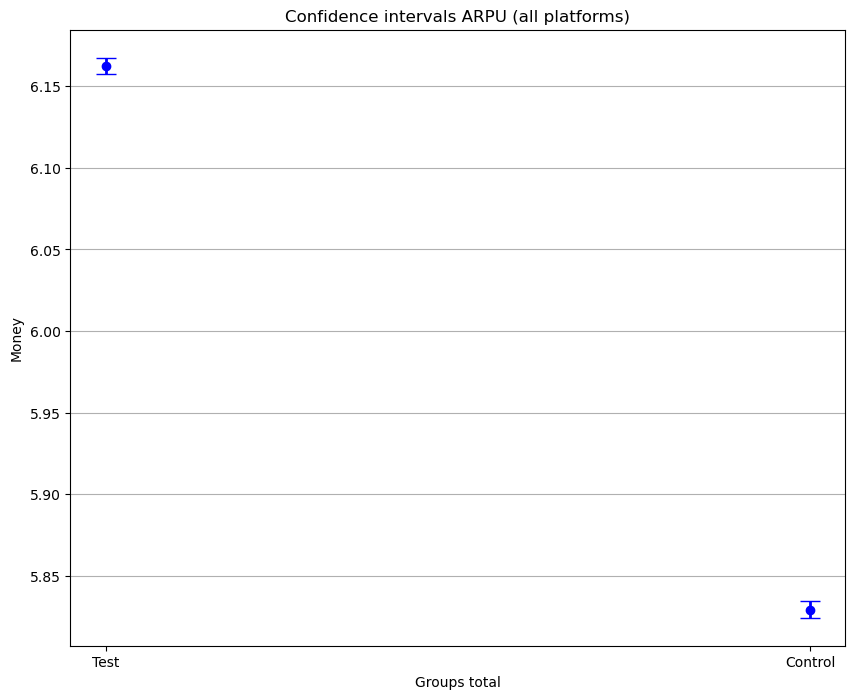

In [10]:
my_errorbar(money_ci_all, color='blue', Xlable='Groups total', Ylable='Money', \
            Title='Confidence intervals ARPU (all platforms)')

### ARPU Xbox

In [11]:
# XBox
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_test_XB  = conf_int(users_money[(users_money['group'] == 'test') & (users_money['platform'] == 'XBox')]['money'])
conf_control_XB  = conf_int(users_money[(users_money['group'] == 'control')\
                                        & (users_money['platform'] == 'XBox')]['money'])

# Creating DataFrames for comparison using pair_stats() function:
money_ci_XB = pair_stats(conf_test_XB, conf_control_XB)
money_ci_XB

,start,stop,mean,int_size
Test,6.123931,6.141601,6.132766,0.008835
Control,6.094734,6.112308,6.103521,0.008787


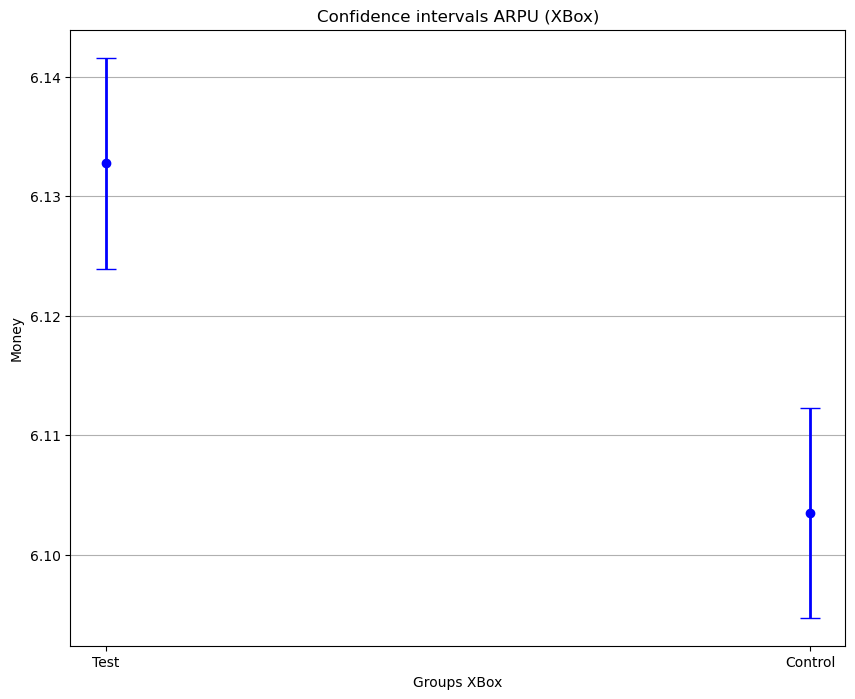

In [12]:
my_errorbar(money_ci_XB, color='blue', Xlable='Groups XBox', Ylable='Money', \
            Title='Confidence intervals ARPU (XBox)')

### ARPU PS4

In [13]:
# PS4
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_test_PS4  = conf_int(users_money[(users_money['group'] == 'test') & (users_money['platform'] == 'PS4')]['money'])
conf_control_PS4  = conf_int(users_money[(users_money['group'] == 'control') \
                                         & (users_money['platform'] == 'PS4')]['money'])

# Creating DataFrames for comparison using pair_stats() function:
money_ci_PS4 = pair_stats(conf_test_PS4, conf_control_PS4)
money_ci_PS4

,start,stop,mean,int_size
Test,6.076160,6.093605,6.084883,0.008723
Control,5.729017,5.746277,5.737647,0.008630


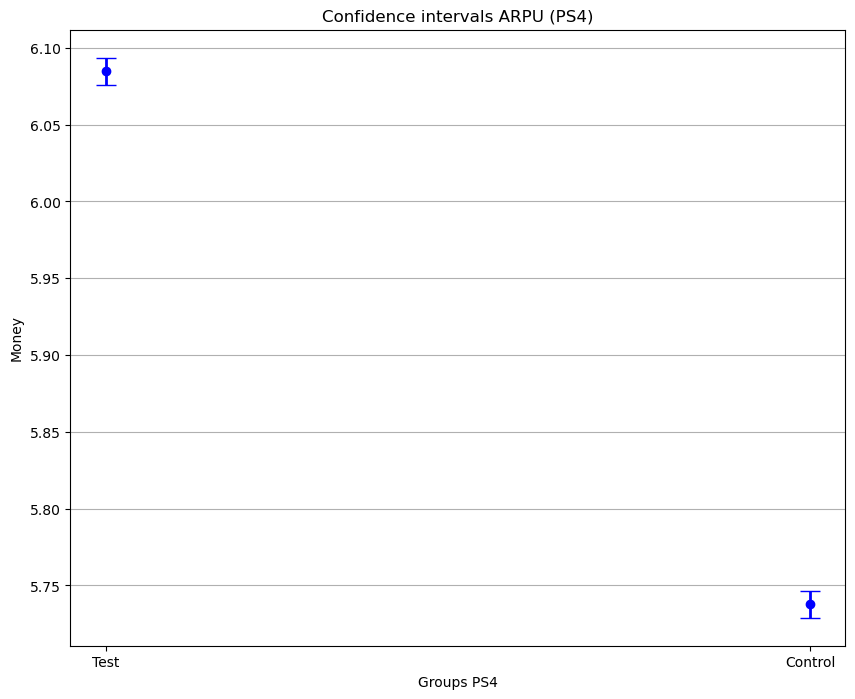

In [14]:
my_errorbar(money_ci_PS4, color='blue', Xlable='Groups PS4', Ylable='Money', \
            Title='Confidence intervals ARPU (PS4)')

### PC

In [15]:
# PC
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_test_PC  = conf_int(users_money[(users_money['group'] == 'test') & (users_money['platform'] == 'PC')]['money'])
conf_control_PC  = conf_int(users_money[(users_money['group'] == 'control') \
                                        & (users_money['platform'] == 'PC')]['money'])

# Creating DataFrames for comparison using pair_stats() function:
money_ci_PC = pair_stats(conf_test_PC, conf_control_PC)
money_ci_PC

,start,stop,mean,int_size
Test,6.260127,6.277965,6.269046,0.008919
Control,5.637802,5.654601,5.646201,0.008400


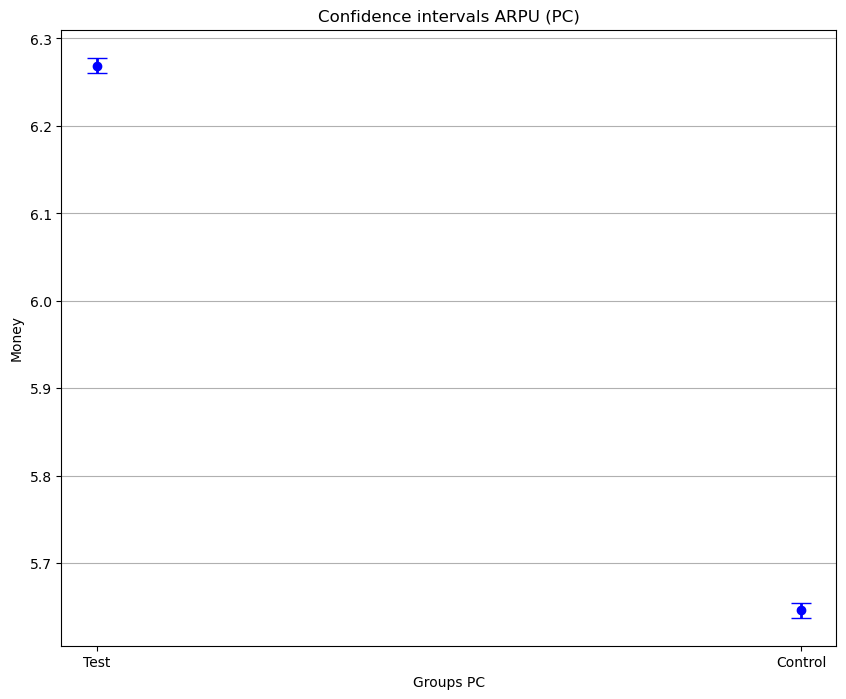

In [16]:
my_errorbar(money_ci_PC, color='blue', Xlable='Groups PC', Ylable='Money', \
            Title='Confidence intervals ARPU (PC)')

## ARPPU (average revenue per paying user)

ARPPU metrics refer to how much real-world money, on average, a deposited a user, who had deposited at least once. It is the arithmetic mean of 'money' for all users, whose 'money' are greater than 0.

In [17]:
# Creating a DataFrame with paying users
paying_users = users_money[users_money['money'] > 0]

I will calculate the confidence intervals for ARPPU metric overall and by gaming platforms.

### ARPPU total

In [18]:
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
ci_test = conf_int(paying_users[paying_users['group'] == 'test']['money'])
ci_control = conf_int(paying_users[paying_users['group'] == 'control']['money'])

# Creating DataFrames for comparison using the pair_stats() function:
paying_ci_all = pair_stats(ci_test, ci_control)
paying_ci_all

,start,stop,mean,int_size
Test,6.158047,6.168241,6.163144,0.005097
Control,5.826117,5.836101,5.831109,0.004992


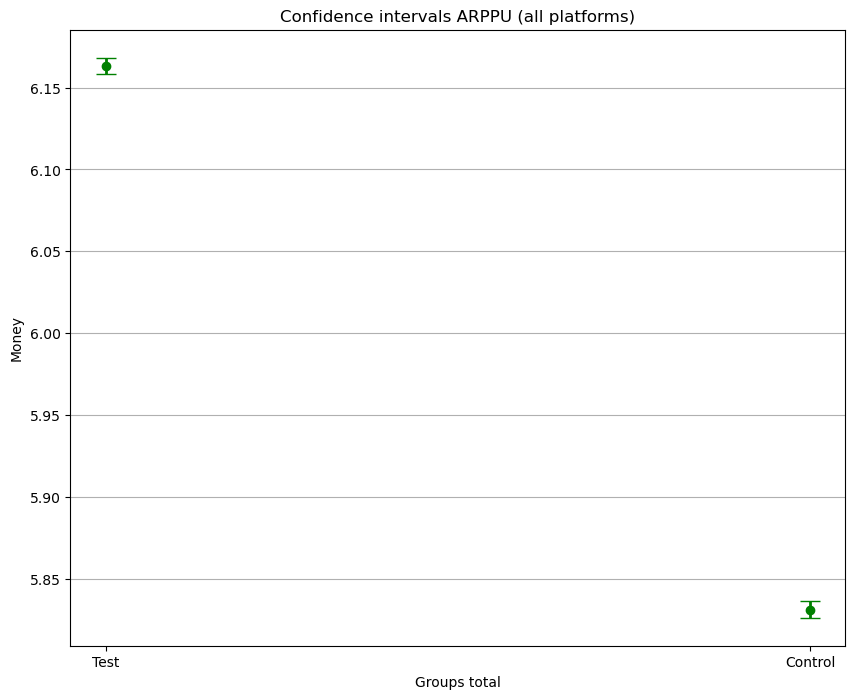

In [19]:
my_errorbar(paying_ci_all, color='green', Xlable='Groups total', Ylable='Money', \
            Title='Confidence intervals ARPPU (all platforms)')

### ARPPU Xbox

In [20]:
# XBox
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
ci_test_XB = conf_int(paying_users[(paying_users['group'] == 'test') & (paying_users['platform'] == 'XBox')]['money'])
ci_control_XB = conf_int(paying_users[(paying_users['group'] == 'control')\
                                      & (paying_users['platform'] == 'XBox')]['money'])

# Creating DataFrames for comparison using the pair_stats() function:
paying_ci_XB = pair_stats(ci_test_XB, ci_control_XB)
paying_ci_XB

,start,stop,mean,int_size
Test,6.124856,6.142515,6.133686,0.008829
Control,6.095653,6.113215,6.104434,0.008781


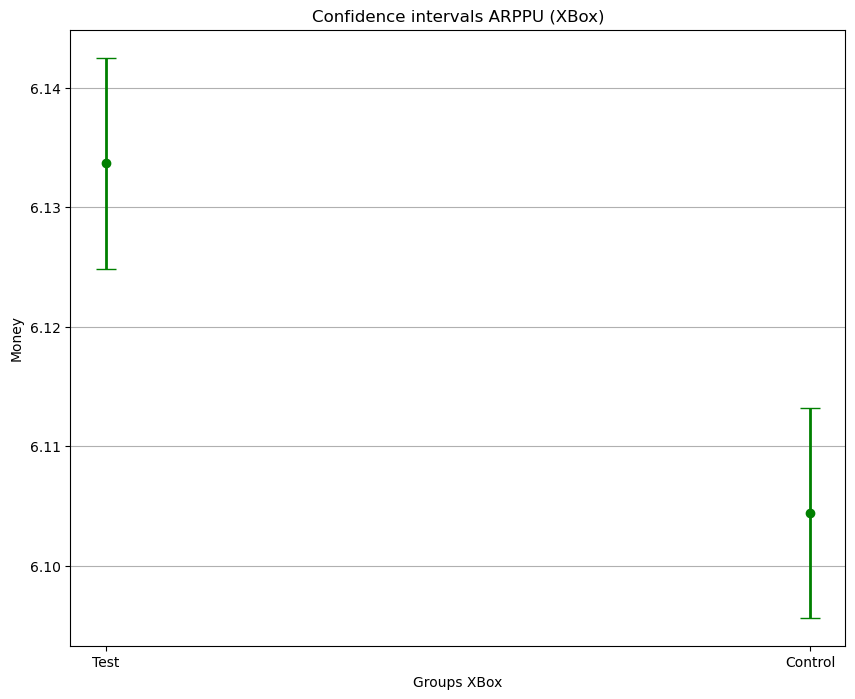

In [21]:
my_errorbar(paying_ci_XB, color='green', Xlable='Groups XBox', Ylable='Money', \
            Title='Confidence intervals ARPPU (XBox)')

### ARPPU PS4

In [22]:
# PS4
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
ci_test_PS4 = conf_int(paying_users[(paying_users['group'] == 'test') & (paying_users['platform'] == 'PS4')]['money'])
ci_control_PS4 = conf_int(paying_users[(paying_users['group'] == 'control') \
                                       & (paying_users['platform'] == 'PS4')]['money'])

# Creating DataFrames for comparison using the pair_stats() function:
paying_ci_PS4 = pair_stats(ci_test_PS4, ci_control_PS4)
paying_ci_PS4

,start,stop,mean,int_size
Test,6.077150,6.094583,6.085866,0.008717
Control,5.730847,5.748086,5.739466,0.008620


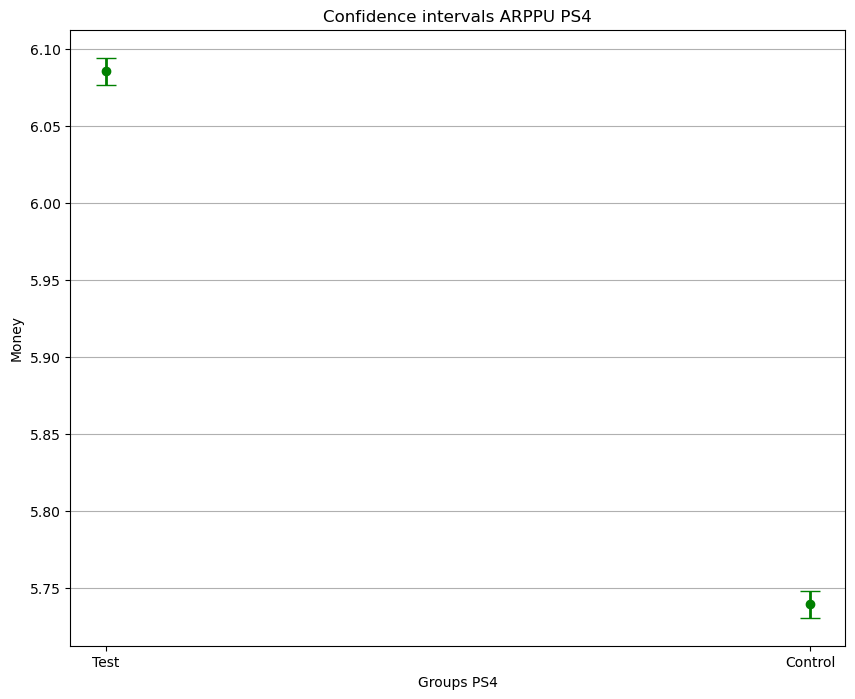

In [23]:
my_errorbar(paying_ci_PS4, color='green', Xlable='Groups PS4', Ylable='Money', \
            Title='Confidence intervals ARPPU PS4')

### ARPPU PC

In [24]:
# PC
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
ci_test_PC = conf_int(paying_users[(paying_users['group'] == 'test') & (paying_users['platform'] == 'PC')]['money'])
ci_control_PC = conf_int(paying_users[(paying_users['group'] == 'control') \
                                      & (paying_users['platform'] == 'PC')]['money'])

# Creating DataFrames for comparison using the pair_stats() function:
paying_ci_PC = pair_stats(ci_test_PC, ci_control_PC)
paying_ci_PC

,start,stop,mean,int_size
Test,6.260829,6.278658,6.269743,0.008914
Control,5.639919,5.656695,5.648307,0.008388


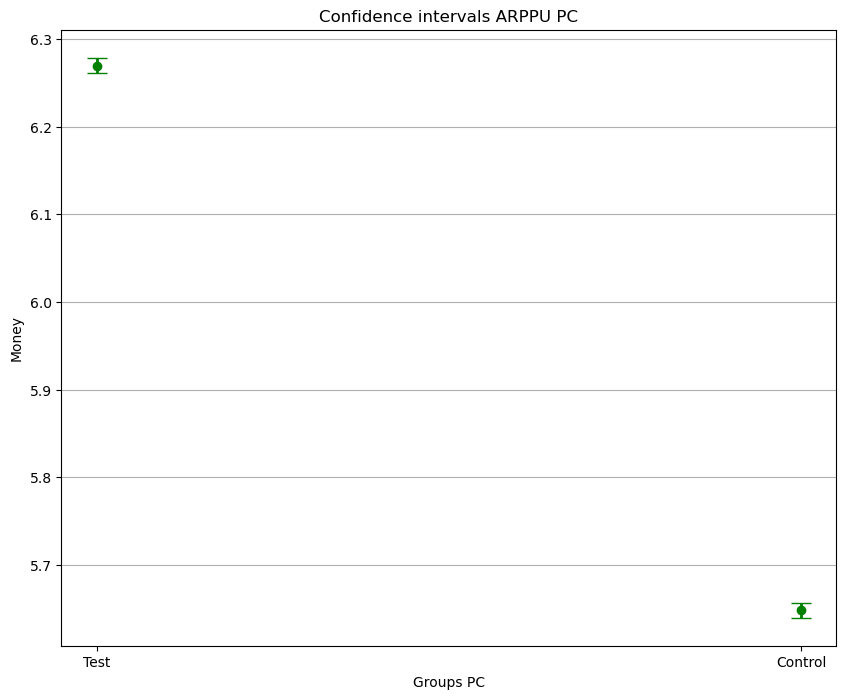

In [25]:
my_errorbar(paying_ci_PC, color='green', Xlable='Groups PC', Ylable='Money', \
            Title='Confidence intervals ARPPU PC')

## Average Cash (in-game currency)
### Cash total

In [26]:
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_cash_test_all = conf_int(users_cash[users_cash['group'] == 'test']['cash'])
conf_cash_control_all = conf_int(users_cash[users_cash['group'] == 'control']['cash'])

# Creating DataFrames for comparison using the pair_stats() function:
cash_ci_all =  pair_stats(conf_cash_test_all, conf_cash_control_all)
cash_ci_all

,start,stop,mean,int_size
Test,6225.829382,6233.363256,6229.596319,3.766937
Control,5797.112373,5804.298391,5800.705382,3.593009


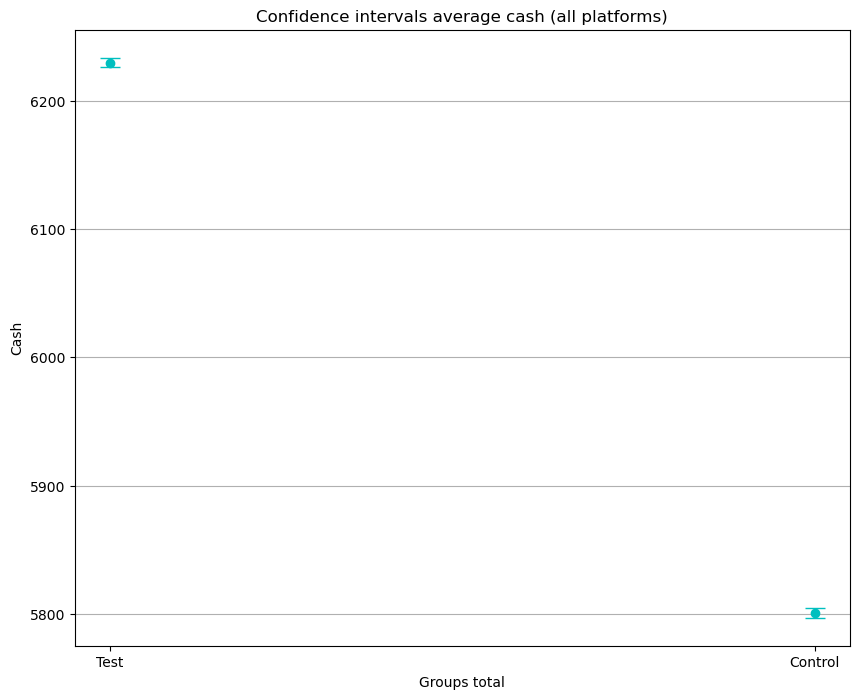

In [27]:
my_errorbar(cash_ci_all, color='c', Xlable='Groups total', Ylable='Cash', \
            Title='Confidence intervals average cash (all platforms)')

### Cash XBOX

In [28]:
# XBox
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_cash_test_XB  = conf_int(users_cash[(users_cash['group'] == 'test') & (users_cash['platform'] == 'XBox')]['cash'])
conf_cash_control_XB  = conf_int(users_cash[(users_cash['group'] == 'control') & (users_cash['platform'] == 'XBox')]['cash'])

# Creating DataFrames for comparison using the pair_stats() function:
cash_ci_XB = pair_stats(conf_cash_test_XB, conf_cash_control_XB)
cash_ci_XB

,start,stop,mean,int_size
Test,6169.930394,6182.875350,6176.402872,6.472478
Control,6125.335310,6138.251734,6131.793522,6.458212


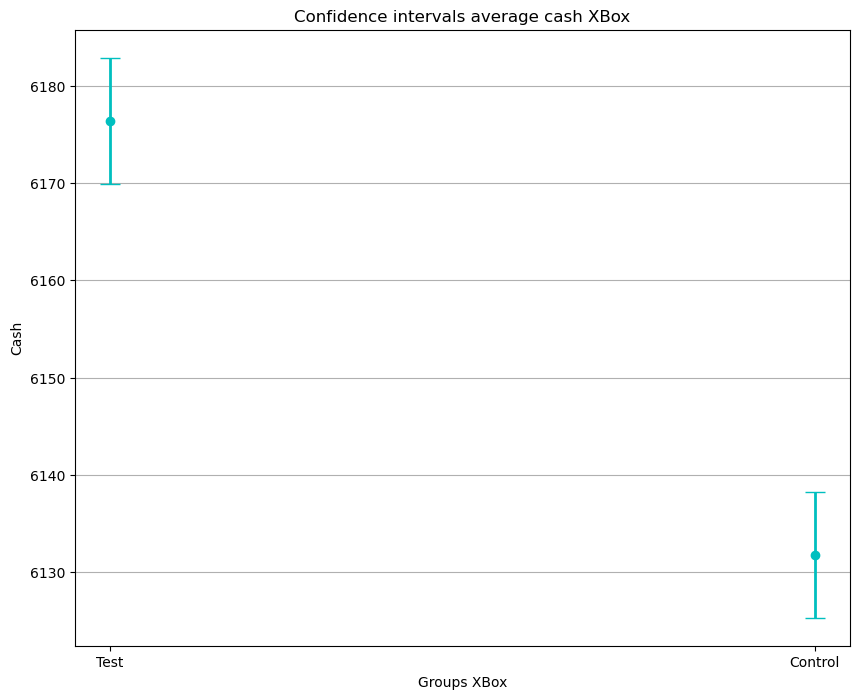

In [29]:
my_errorbar(cash_ci_XB, color='c', Xlable='Groups XBox', Ylable='Cash', \
            Title='Confidence intervals average cash XBox')

### Cash PS4

In [30]:
# PS4
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_cash_test_PS4  = conf_int(users_cash[(users_cash['group'] == 'test') & (users_cash['platform'] == 'PS4')]['cash'])
conf_cash_control_PS4  = conf_int(users_cash[(users_cash['group'] == 'control') \
                                             & (users_cash['platform'] == 'PS4')]['cash'])

# Creating DataFrames for comparison using the pair_stats() function:
cash_ci_PS4 = pair_stats(conf_cash_test_PS4, conf_cash_control_PS4)
cash_ci_PS4

,start,stop,mean,int_size
Test,6124.189825,6136.796715,6130.493270,6.303445
Control,5675.768217,5688.104111,5681.936164,6.167947


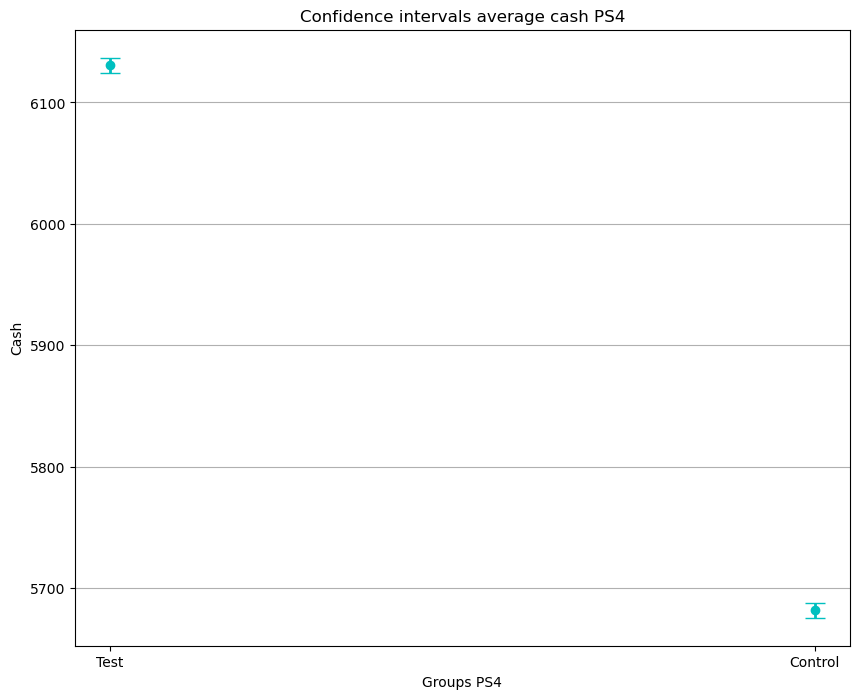

In [31]:
my_errorbar(cash_ci_PS4, color='c', Xlable='Groups PS4', Ylable='Cash', \
            Title='Confidence intervals average cash PS4')

### Cash PC

In [32]:
# Calculating parameters of conf. intervals for the test and control groups using the custom conf_int() function:
conf_cash_test_PC  = conf_int(users_cash[(users_cash['group'] == 'test') & (users_cash['platform'] == 'PC')]['cash'])
conf_cash_control_PC  = conf_int(users_cash[(users_cash['group'] == 'control')\
                                            & (users_cash['platform'] == 'PC')]['cash'])


# Creating DataFrames for comparison using the pair_stats() function:
cash_ci_PC = pair_stats(conf_cash_test_PC, conf_cash_control_PC)
cash_ci_PC

,start,stop,mean,int_size
Test,6375.014600,6388.476669,6381.745635,6.731034
Control,5581.376572,5592.827799,5587.102185,5.725614


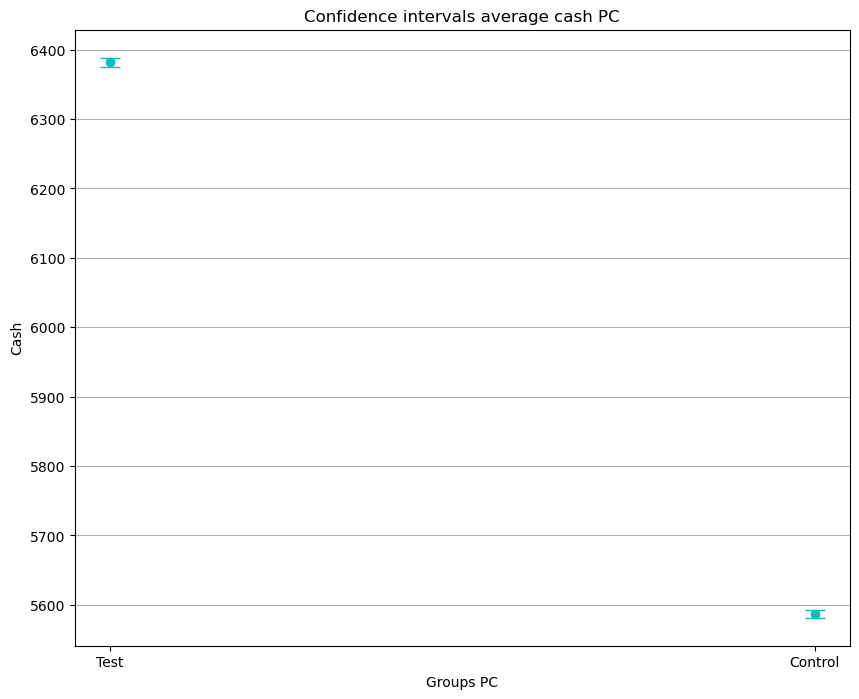

In [33]:
my_errorbar(cash_ci_PC, color='c', Xlable='Groups PC', Ylable='Cash', \
            Title='Confidence intervals average cash PC')

## Key takeaways

After calculating confidence intervals for all three metrics (APRU, ARPPU, and Avg. Cash) with 95% confidence, I can conclude that, in each case, the confidence interval of the test group has a greater value and never crossed the respective interval of the control group. 

Hence, I can reject the hypothesis that the test group and control group are drawn from the same population.  

**In business terms, the A/B test demonstrated that the promotional campaign was successful, positively impacting key metrics.**  
I would recommend rolling it out to all users.

Although,it should be noted that the results varied for different gaming platforms.

The most significant response was received from PC users, while the weakest results were obtained from the Xbox platform. The suggestion arising from this is to delve deeper into the reasons why Xbox users seem less interested in the marketing offer.

Let's consolidate our results and visualize them on a bar plot. 

### ARPU

In [34]:
# Concatenating all four DataFrames with paired comparisons into a consolidated one:
arpu_all = money_ci_all.reset_index()
arpu_all['Platform'] = pd.Series(['All', 'All'])
arpu_XB = money_ci_XB.reset_index()
arpu_XB['Platform'] = pd.Series(['XBox', 'XBox'])
arpu_PS4 = money_ci_PS4.reset_index() 
arpu_PS4['Platform'] = pd.Series(['PS4', 'PS4'])
arpu_PC = money_ci_PC.reset_index() 
arpu_PC['Platform'] = pd.Series(['PC', 'PC'])
ARPU = pd.concat([arpu_XB, arpu_PS4, arpu_PC, arpu_all])
ARPU = ARPU[['index', 'mean', 'Platform']]
ARPU.columns = ['Group', 'Avg', 'Platform']
ARPU

,Group,Avg,Platform
0,Test,6.132766,XBox
1,Control,6.103521,XBox
0,Test,6.084883,PS4
1,Control,5.737647,PS4
0,Test,6.269046,PC
1,Control,5.646201,PC
0,Test,6.162276,All
1,Control,5.829478,All


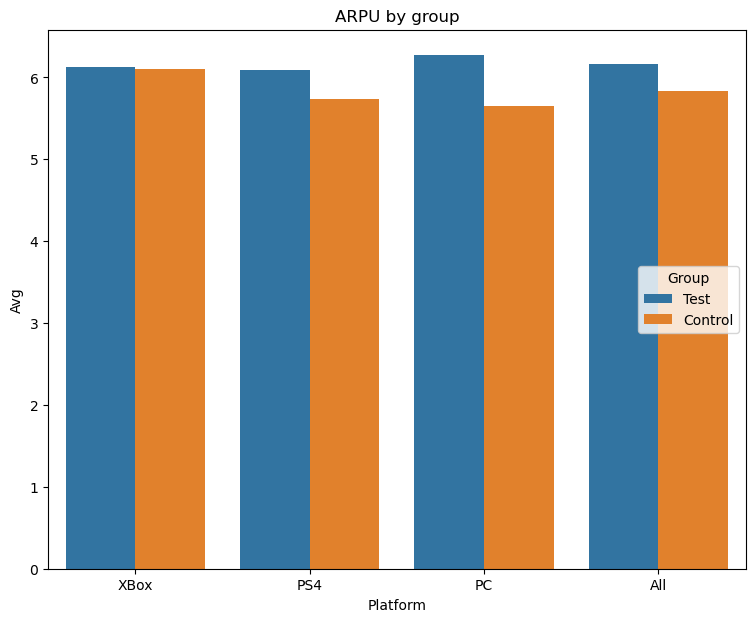

In [35]:
my_barplot(ARPU, 'ARPU by group')

In [36]:
ARPU.set_index(['Platform', 'Group'])

Avg
Platform Group            
XBox     Test     6.132766
         Control  6.103521
PS4      Test     6.084883
         Control  5.737647
PC       Test     6.269046
         Control  5.646201
All      Test     6.162276
         Control  5.829478

### ARPPU

In [37]:
# Concatenating all four DataFrames with paired comparisons into a consolidated one:
arppu_all = paying_ci_all.reset_index()
arppu_all['Platform'] = pd.Series(['All', 'All'])
arppu_XB = paying_ci_XB.reset_index()
arppu_XB['Platform'] = pd.Series(['XBox', 'XBox'])
arppu_PS4 = paying_ci_PS4.reset_index()
arppu_PS4['Platform'] = pd.Series(['PS4', 'PS4'])
arppu_PC = paying_ci_PC.reset_index()
arppu_PC['Platform'] = pd.Series(['PC', 'PC'])
ARPPU = pd.concat([arppu_XB, arppu_PS4, arppu_PC, arppu_all])
ARPPU = ARPPU[['index', 'mean', 'Platform']]
ARPPU.columns = ['Group', 'Avg', 'Platform']
ARPPU

,Group,Avg,Platform
0,Test,6.133686,XBox
1,Control,6.104434,XBox
0,Test,6.085866,PS4
1,Control,5.739466,PS4
0,Test,6.269743,PC
1,Control,5.648307,PC
0,Test,6.163144,All
1,Control,5.831109,All


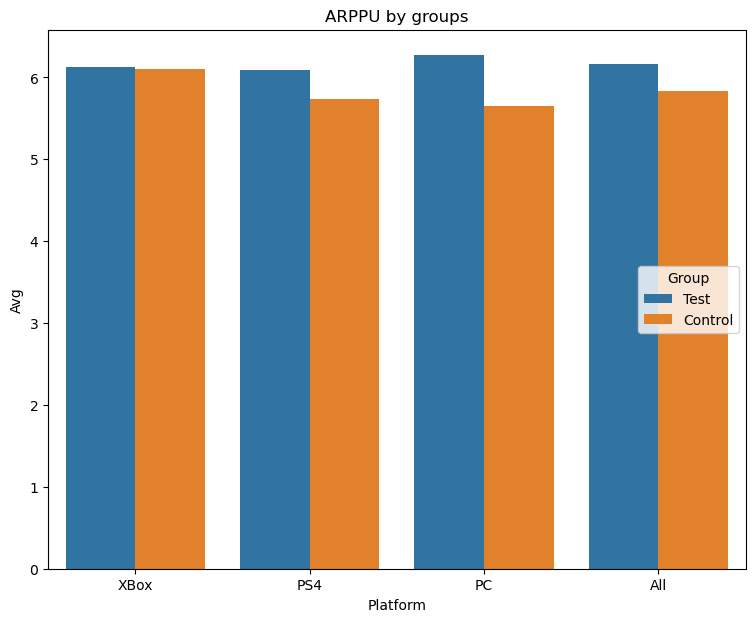

In [38]:
my_barplot(ARPPU, 'ARPPU by groups')

In [39]:
ARPPU.set_index(['Platform', 'Group'])

Avg
Platform Group            
XBox     Test     6.133686
         Control  6.104434
PS4      Test     6.085866
         Control  5.739466
PC       Test     6.269743
         Control  5.648307
All      Test     6.163144
         Control  5.831109

### Average Cash (in-game currency)

In [40]:
# Concatenating all four DataFrames with paired comparisons into a consolidated one:
transactions_all = cash_ci_all.reset_index()
transactions_all['Platform'] = pd.Series(['All', 'All'])
transactions_XB = cash_ci_XB.reset_index()
transactions_XB['Platform'] = pd.Series(['XBox', 'XBox'])
transactions_PS4 = cash_ci_PS4.reset_index()
transactions_PS4['Platform'] = pd.Series(['PS4', 'PS4'])
transactions_PC = cash_ci_PC.reset_index()
transactions_PC['Platform'] = pd.Series(['PC', 'PC'])
transactions = pd.concat([transactions_XB, transactions_PS4, transactions_PC, transactions_all])
transactions = transactions[['index', 'mean', 'Platform']]
transactions.columns = ['Group', 'Avg', 'Platform']
transactions

,Group,Avg,Platform
0,Test,6176.402872,XBox
1,Control,6131.793522,XBox
0,Test,6130.493270,PS4
1,Control,5681.936164,PS4
0,Test,6381.745635,PC
1,Control,5587.102185,PC
0,Test,6229.596319,All
1,Control,5800.705382,All


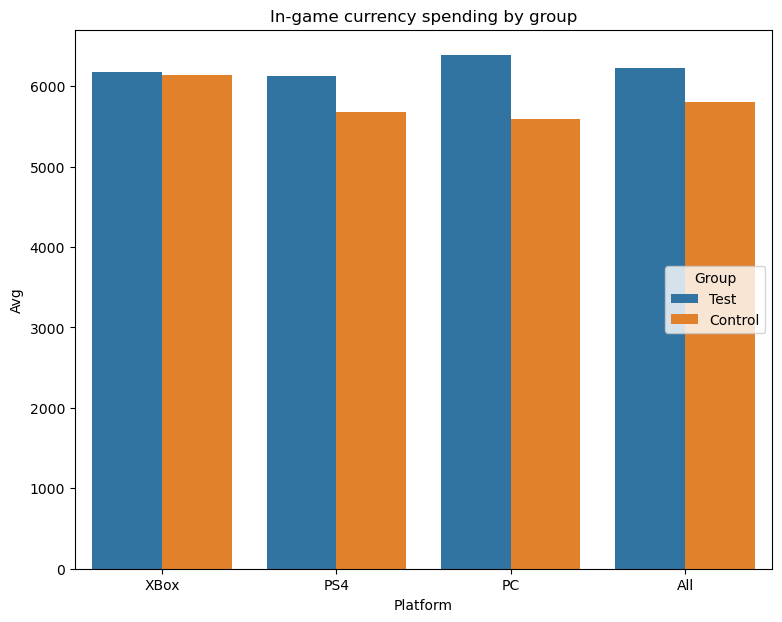

In [41]:
my_barplot(transactions, 'In-game currency spending by group')